In [8]:
import numpy as np

data=np.load('data/data.npy')
target=np.load('data/target.npy')
data.shape[1:]

(50, 50, 1)

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D, Dropout

model=Sequential()

model.add(Conv2D(256,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

model.add(Dense(target.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 256)       2560      
                                                                 
 activation_2 (Activation)   (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 128)       295040    
                                                                 
 activation_3 (Activation)   (None, 22, 22, 128)       0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 11, 11, 128)       0         
 g2D)                                                 

In [10]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [11]:
history=model.fit(train_data,train_target, validation_data=(test_data,test_target), epochs=50) #50-100

Epoch 1/50
190/190 [==============================] - 73s 381ms/step - loss: 0.4446 - accuracy: 0.8465 - val_loss: 0.3853 - val_accuracy: 0.8891
Epoch 2/50
190/190 [==============================] - 72s 380ms/step - loss: 0.2608 - accuracy: 0.9237 - val_loss: 0.2792 - val_accuracy: 0.9216
Epoch 3/50
190/190 [==============================] - 72s 379ms/step - loss: 0.2122 - accuracy: 0.9406 - val_loss: 0.2123 - val_accuracy: 0.9408
Epoch 4/50
190/190 [==============================] - 72s 377ms/step - loss: 0.1914 - accuracy: 0.9459 - val_loss: 0.1906 - val_accuracy: 0.9423
Epoch 5/50
190/190 [==============================] - 72s 377ms/step - loss: 0.1792 - accuracy: 0.9492 - val_loss: 0.1682 - val_accuracy: 0.9482
Epoch 6/50
190/190 [==============================] - 73s 382ms/step - loss: 0.1658 - accuracy: 0.9503 - val_loss: 0.1701 - val_accuracy: 0.9541
Epoch 7/50
190/190 [==============================] - 74s 387ms/step - loss: 0.1600 - accuracy: 0.9549 - val_loss: 0.1639 - val_ac

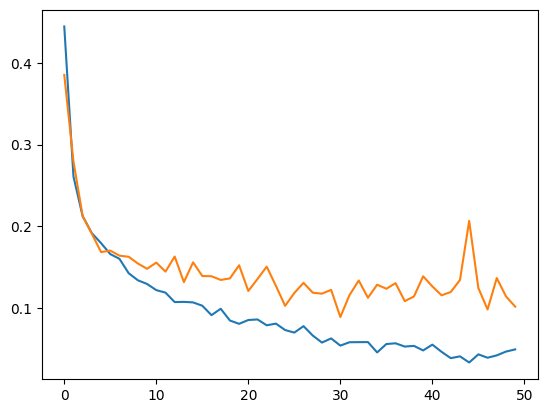

In [14]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

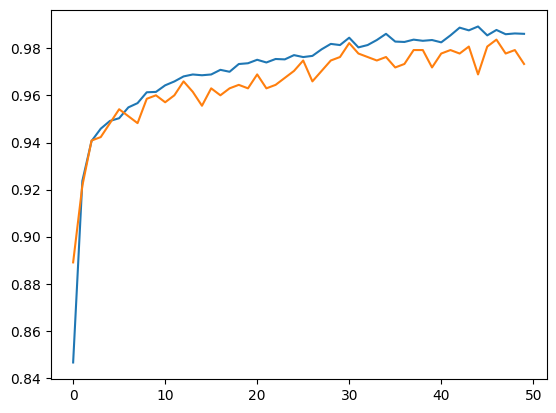

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [16]:
accc = model.evaluate(test_data,test_target)
print(accc)

22/22 [==============================] - 1s 53ms/step - loss: 0.1015 - accuracy: 0.9734
[0.10146872699260712, 0.973372757434845]


In [23]:
model.save_weights(f'models/Ai_Robot1-{accc[1]}.h5')